## Content
[1. Introduction ](#1)

[2. Libraries](#2)
  * [2.1 Insights & Summary](#2.11)

[3. Feature Engineering](#3)
  * [3.1 ](#3.1)

[4. Exploratory Data Analysis ](#4)
  * [4.1 Question 1](#4.1)
  * [4.2 Question 2](#4.2)
  * [4.3 Question 3](#4.3)


<a id='#1'></a>
**ShopSmart Inc.** is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. 

To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.


Project Objective: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:
1.     Segment customers based on their preferences, geographic location, and purchasing behavior.
2.     Enhance website usability and user experience based on insights gained from customer interactions.
3.     Optimize product offerings and marketing strategies to improve customer satisfaction and retention.


## 1. Libraries 
<a id="1"></a>

In [1]:
!pip install a-world-of-countries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import missingno
import plotly.graph_objects as go
import plotly.express as px
import awoc
import seaborn as sns
import warnings
from  IPython.display import display,Markdown

In [2]:
warnings.filterwarnings('ignore')

def printmd(value):
    display(Markdown(value))
    
sns.set_theme(style="white", palette="pastel")

sns.set_palette('dark')

def get_continent(location):
    for obj in all_countries:
        if obj['Country Name'] == location:
            return obj['Continent Name']
    else:
        if location == 'Korea':
            return 'Asia'
        elif location == 'United States of America':
            return 'North America'
        return 'Other Islands'
        
def added_removed(feature_name1):
    product_added = pd.pivot(data=new_data[new_data['event_type'] == 'add_to_cart'], values=feature_name1,columns='continent').mode().stack()[0]
    product_removed = pd.pivot(
        data=new_data[new_data['event_type'] == 'remove_from_cart'],
        values=feature_name1, columns='continent').mode().stack()[0]
    product_result = pd.concat([
        product_added,product_removed],axis=1, 
        ignore_index=True,names=['added to cart','removed from cart'])
    
    printmd('Each **CONTINENT** and the product customers **ADDED TO AND REMOVED FROM CART**:\n')
    display(product_result.reset_index().rename(columns={'level_0': 'continent', 0: 'added to cart',1:'removed from cart'}))
    print('')

def get_max_n_min_product(feature,feature_name):
    brand_max =  new_data[new_data['event_type'] == feature]['brand'].mode()[0]
    brand_min = new_data[new_data['event_type'] == feature]['brand'].value_counts().idxmin()
    res_max = new_data[new_data['event_type'] == feature]['product_name'].mode()[0]
    res_min = new_data[new_data['event_type'] == feature]['product_name'].value_counts().idxmin()
    
    printmd('The ***most {} brand*** is **{}**'.format(feature_name,brand_max))
    printmd('The ***least {} brand*** is **{}**'.format(feature_name,brand_min))
    print('')
    printmd('The ***most {} product*** is **{}**'.format(feature_name,res_max))
    printmd('The ***least {} product*** is **{}**'.format(feature_name,res_min))

def unlock_df(df_name):
    new_data = df_name['event_data'].apply(json.loads)
    event_df = pd.DataFrame(item for item in new_data)
    return event_df

def visited_checkout_product(feature_name1):
    product_visit = pd.pivot(data=event_visit_type, values=feature_name1, columns='continent').mode().stack()[0]
    product_checkout = pd.pivot(data=checkedout, values=feature_name1, columns='continent').mode().stack()[0]
    product_result = pd.concat([product_visit,product_checkout],axis=1, ignore_index=True,names=['visit','checkout'])
    
    printmd('Each **CONTINENT** and the product customers **VISITED THE MOST**:\n')
    display(product_result.reset_index().rename(columns={'level_0': 'continent', 0: 'most visited brand',1:'most checked out'}))
    print('')
    printmd('Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.')

def get_percentages(d_series):
    return round(d_series/d_series.sum()*100,2)

#### import files

In [3]:
customers = pd.read_csv('customers.csv')
events = pd.read_csv('events.csv')
line_items = pd.read_csv('line_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  10000 non-null  object
 1   device_id    10000 non-null  object
 2   location     10000 non-null  object
 3   currency     10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15 non-null     int64  
 1   name    15 non-null     object 
 2   price   15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147208 entries, 0 to 147207
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_id         147208 non-null  int64 
 1   customer_id      147208 non-null  object
 2   event_data       147208 non-null  object
 3   event_timestamp  147208 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9165 entries, 0 to 9164
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        9165 non-null   object
 1   customer_id     9165 non-null   object
 2   status          9165 non-null   object
 3   checked_out_at  9165 non-null   object
dtypes: object(4)
memory usage: 286.5+ KB


In [8]:
line_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31741 entries, 0 to 31740
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line_item_id  31741 non-null  int64 
 1   order_id      31741 non-null  object
 2   item_id       31741 non-null  int64 
 3   quantity      31741 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 992.0+ KB


In [9]:
# Merge the customers, events, line_items, orders, and products tables on the customer_id column
merged_data = pd.merge(customers, events, on='customer_id', how='outer') # merged customers and events
merged_data = pd.merge(merged_data, orders, on='customer_id', how='outer') # merged above and customer_id
merged_data = pd.merge(merged_data, line_items, on='order_id', how='outer') # merged above and order_id
merged_data = pd.merge(merged_data, products, left_on='item_id', right_on='id', how='outer') # merged above and item_id

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652958 entries, 0 to 652957
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      652958 non-null  object 
 1   device_id        652958 non-null  object 
 2   location         652958 non-null  object 
 3   currency         652958 non-null  object 
 4   event_id         652958 non-null  int64  
 5   event_data       652958 non-null  object 
 6   event_timestamp  652958 non-null  object 
 7   order_id         645885 non-null  object 
 8   status           645885 non-null  object 
 9   checked_out_at   645885 non-null  object 
 10  line_item_id     578320 non-null  float64
 11  item_id          578320 non-null  float64
 12  quantity         578320 non-null  float64
 13  id               578320 non-null  float64
 14  name             578320 non-null  object 
 15  price            578320 non-null  float64
dtypes: float64(5), int64(1), object(10)
me

In [10]:
merged_data.rename(columns={'name':'product_name', 'location':'country'},inplace=True) # rename some of the column names

In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652958 entries, 0 to 652957
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      652958 non-null  object 
 1   device_id        652958 non-null  object 
 2   country          652958 non-null  object 
 3   currency         652958 non-null  object 
 4   event_id         652958 non-null  int64  
 5   event_data       652958 non-null  object 
 6   event_timestamp  652958 non-null  object 
 7   order_id         645885 non-null  object 
 8   status           645885 non-null  object 
 9   checked_out_at   645885 non-null  object 
 10  line_item_id     578320 non-null  float64
 11  item_id          578320 non-null  float64
 12  quantity         578320 non-null  float64
 13  id               578320 non-null  float64
 14  product_name     578320 non-null  object 
 15  price            578320 non-null  float64
dtypes: float64(5), int64(1), object(10)
me

In [12]:
new_data = pd.concat([merged_data,unlock_df(merged_data).drop(
    ['status','quantity','order_id','item_id'],
    axis=1)],axis=1).drop(['event_data','item_id','id','line_item_id','event_timestamp'],
     axis=1)
new_data.head()


,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-21T12:47:11.012084,visit
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-27T11:35:50.208930,visit
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30T04:03:10.392205,visit
3,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14756,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30T04:03:10.394393,add_to_cart
4,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14757,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30T04:03:10.394398,add_to_cart


In [13]:
new_data.to_csv('Sales.csv',index_label=False) #saves merged tables

In [14]:
printmd('**Missing Value Percentages**')
(new_data.isna().sum()/new_data.shape[0]*100).sort_values(ascending=False)

**Missing Value Percentages**

quantity          11.430751
product_name      11.430751
price             11.430751
order_id           1.083224
status             1.083224
checked_out_at     1.083224
customer_id        0.000000
device_id          0.000000
country            0.000000
currency           0.000000
event_id           0.000000
timestamp          0.000000
event_type         0.000000
dtype: float64

In [15]:
new_data['quantity'] = new_data['quantity'].fillna(0).astype(int)

In [16]:
new_data.describe()

,event_id,quantity,price
count,652958.000000,652958.000000,578320.000000
mean,88246.576898,2.665812,707.448609
std,42528.242101,1.634111,972.915321
min,14753.000000,0.000000,5.990000
25%,51324.250000,1.000000,149.950000
50%,88382.000000,3.000000,349.990000
75%,125016.000000,4.000000,899.990000
max,161960.000000,5.000000,3999.990000


In [17]:
new_data.describe(exclude='number').T

,count,unique,top,freq
customer_id,652958,10000,eb7dcb88-073d-403e-bdd4-1e5725fe2338,372
device_id,652958,10000,5d53495a-55ac-49bf-b876-ad1ac4b8d2a4,372
country,652958,243,Korea,7496
currency,652958,3,USD,223367
order_id,645885,9165,5cc9c814-c69a-4831-9b50-92abe2c1dea2,372
status,645885,3,failed,219558
checked_out_at,645885,9165,2024-03-30 04:09:12.797464,372
product_name,578320,15,Canon EOS R5 Camera,39715
timestamp,652958,142501,2024-03-30T04:03:10.735158,24
event_type,652958,4,add_to_cart,302724


In [18]:
printmd(f'The number of duplicate rows = {len(new_data[new_data.duplicated()])}')

The number of duplicate rows = 0

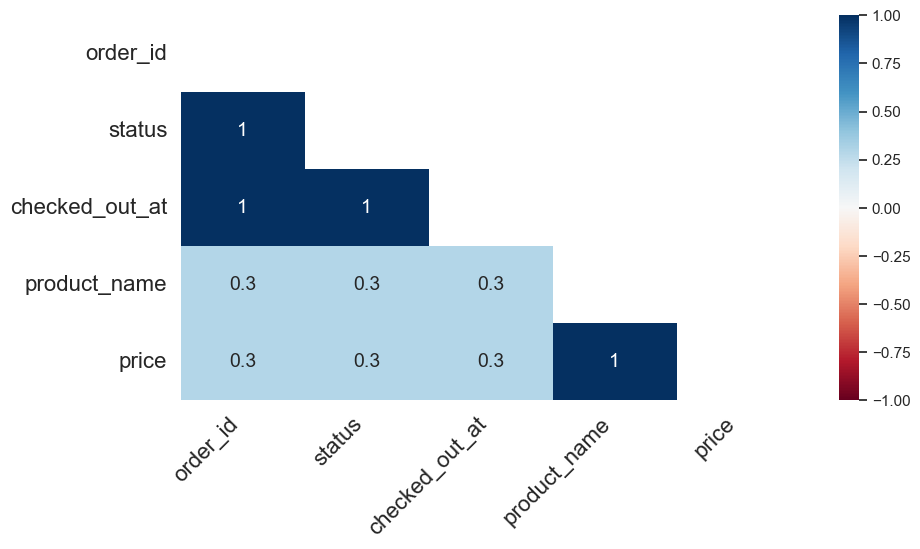

In [19]:
ax = missingno.heatmap(new_data,figsize=(10,5))

In [20]:
new_data['currency'] = new_data['currency'].astype('category')

### Date Time Transformation

In [21]:
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'],format='%Y-%m-%dT%H:%M:%S.%f')
new_data['checked_out_at'] = pd.to_datetime(new_data['checked_out_at'], format='%Y-%m-%d %H:%M:%S.%f')

In [22]:
printmd(f'Dataset start date = {new_data["timestamp"].dt.date.min()}')
printmd(f'Dataset end date = {new_data["timestamp"].dt.date.max()}')
printmd(f'Dataset Spanning Through {new_data["timestamp"].dt.date.max() - new_data["timestamp"].dt.date.min()}')

Dataset start date = 2024-03-19

Dataset end date = 2024-03-30

Dataset Spanning Through 11 days, 0:00:00

In [23]:
new_data['day'] = new_data['timestamp'].dt.day_name()

### Feature Engineering
<a id=2></a>

In [24]:
country = new_data['country']
country = country.apply(lambda x: x.split('(')[0].strip())
# Replace country names so as to get them from awoc library
country.replace({'United States of America': 'United States',
                     'Congo': 'Democratic Republic of the Congo',
                     "Lao People's Democratic Republic":'Laos',
                     "Brunei Darussalam":'Brunei',
                     "Kyrgyz Republic":'Kyrgyzstan',
                     "Macao":'Macau',
                     "Palestinian Territory":"Palestine",
                     "Syrian Arab Republic":'Syria',
                     "Cote d'Ivoire":'Ivory Coast',
                     'Russian Federation':'Russia',
                     "North Macedonia":'Macedonia', 
                     'South Korea':'Korea',
                     'North Korea':'Korea',
                     'Cocos':'Cocos Islands',
                     "Libyan Arab Jamahiriya":'Libya'}, inplace=True)


In [25]:
all_countries = awoc.AWOC().get_countries() # get dictionary of all countries

In [26]:
new_data['continent'] = country.apply(get_continent)
new_data['country'].replace({'Democratic Republic of the Congo':'Congo'},inplace=True) # 'Congo 'is better for visualization

In [27]:
new_data['price_range'] = pd.qcut(new_data.price,3, labels=['low','mid','high']) # separating prices into three price range 

In [28]:
new_data['product_name'].replace({'iPhone 13':'Apple iPhone 13'}, inplace=True) # Added brand name to iPhone

In [29]:
new_data['brand'] = new_data['product_name'].apply(lambda x : x.split(' ')[0] if not pd.isna(x) else x) # extract brand name from products

In [30]:
new_data['number_of_days_transaction'] = np.ceil(
    new_data.groupby('customer_id')['timestamp'].transform(
        lambda x:np.ptp(x)).dt.total_seconds()/86400) #86400 is the total seconds in a day

In [31]:
new_data['total_order_price'] = new_data['quantity'] * new_data['price']

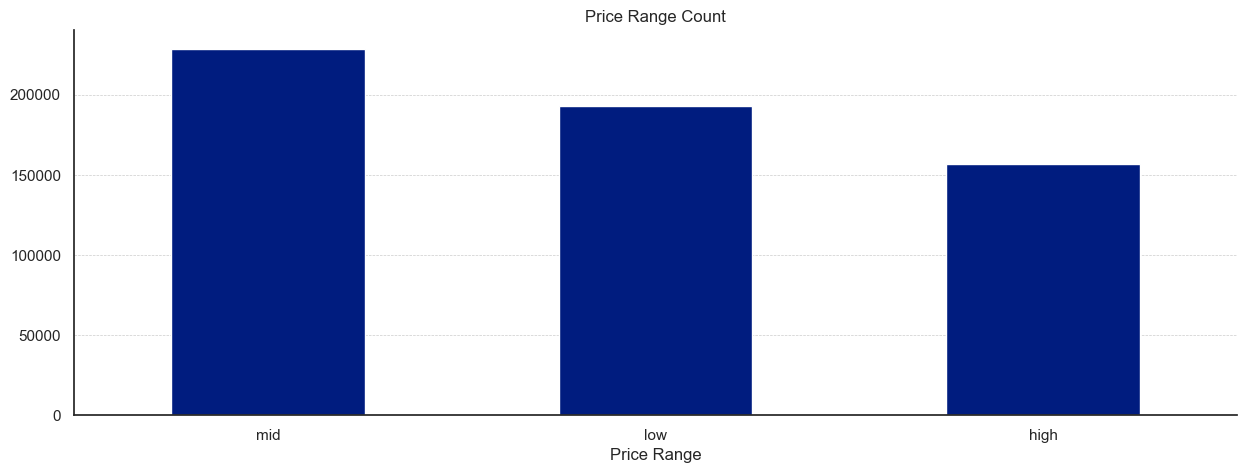

In [32]:
ax = new_data['price_range'].value_counts().plot(kind='bar',figsize=(15,5))
plt.xticks(rotation=0)
plt.xlabel('Price Range')
plt.title('Price Range Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

## 3. EDA 
<a id="3"></a>

In [33]:
printmd('Of all transaction performed, **total of customers** are **{1}** <br> **Total devices** used on the sites are **{0}** <br>**Total transactions** are **{2}**'.format(new_data['device_id'].nunique(),new_data['customer_id'].nunique(),new_data['order_id'].nunique()))
printmd(f'Total number of products are **{products.shape[0]}**')
printmd(f'Total number of Countries are **{len(new_data["country"].unique())}**')


Of all transaction performed, **total of customers** are **10000** <br> **Total devices** used on the sites are **10000** <br>**Total transactions** are **9165**

Total number of products are **15**

Total number of Countries are **243**

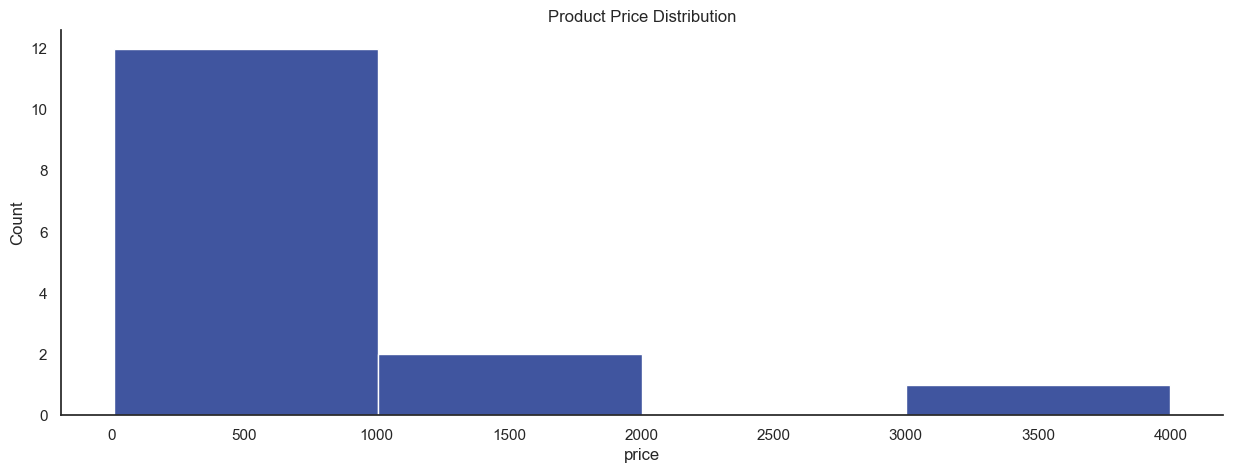

In [34]:
# price distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(products['price'],bins=4)
ax.set_title('Product Price Distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Most of the products prices are within the range of $ to $1000 

In [35]:
corr_features = ['quantity','price','number_of_days_transaction']
new_data[corr_features].corr()

,quantity,price,number_of_days_transaction
quantity,1.000000,0.003496,-0.001709
price,0.003496,1.000000,0.008807
number_of_days_transaction,-0.001709,0.008807,1.000000


##### There are just little correclation between the price, the quantity checked out and number of days of transaction

There is no relationship in the price and the quantity of products checked out

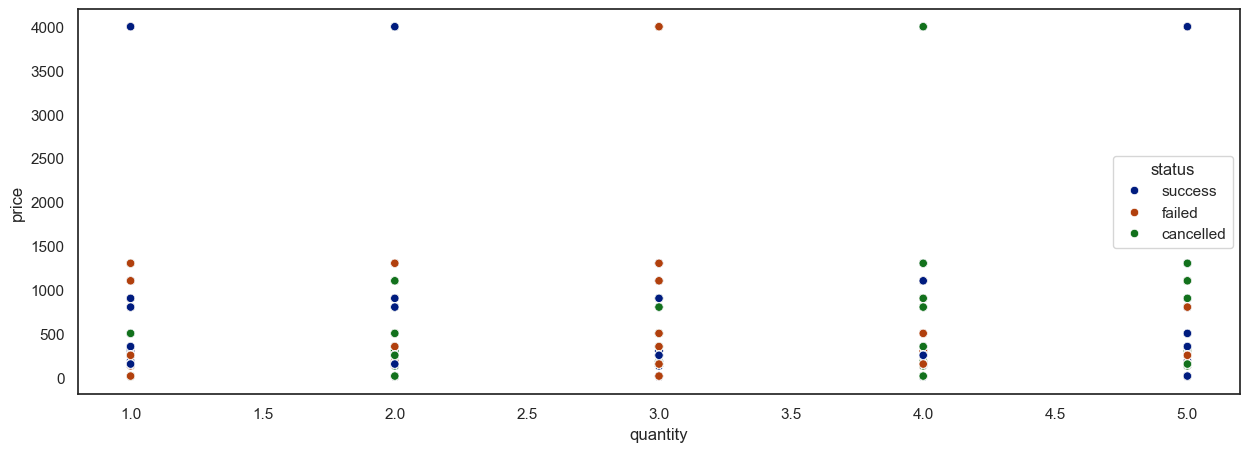

In [36]:
# correlation between price and quantity of product bought
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=new_data[new_data['event_type'] == 'checkout'], x='quantity',y='price', hue='status')
printmd('There is no relationship in the price and the quantity of products checked out')

In [37]:
printmd("There is **no correlation** (pattern) between the **quantity of product** purchased and the **price of the products**") 

There is **no correlation** (pattern) between the **quantity of product** purchased and the **price of the products**

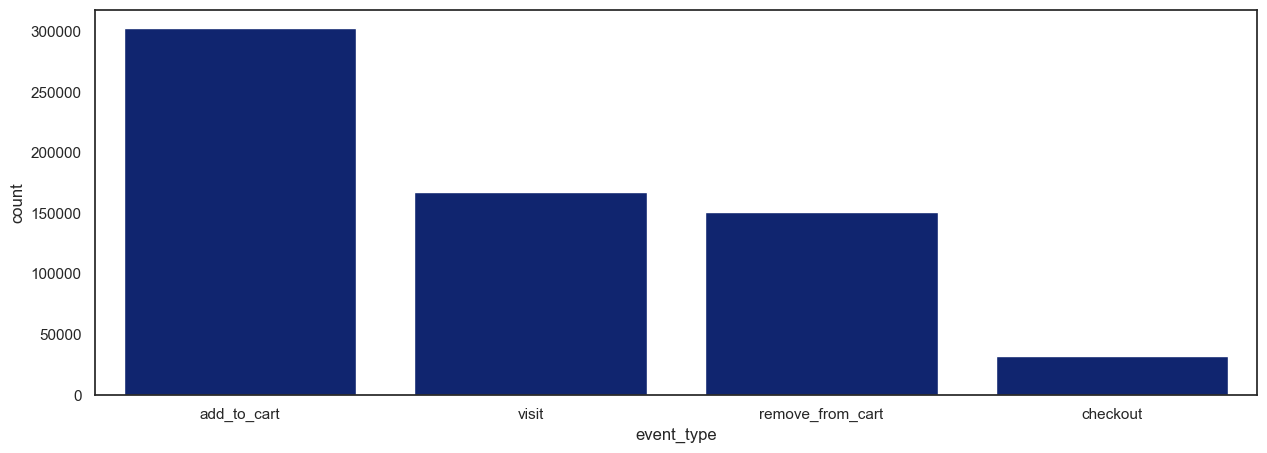

In [38]:
plt.figure(figsize=(15,5))
event_types = new_data['event_type'].value_counts()
ax = sns.barplot(event_types)

In [39]:
printmd(f'Majority of the order status are either **cancelled (33.70%)** or **Failed (33.58%)** while success is just (32.71%). Therefore **Unsuccessful orders** are **{(33.7+33.58) - 32.71}%** more than the **successful purchase**')

Majority of the order status are either **cancelled (33.70%)** or **Failed (33.58%)** while success is just (32.71%). Therefore **Unsuccessful orders** are **34.57%** more than the **successful purchase**

### 3.1 Visit Frequency 
<!-- <a id="3.1"></a> -->
- How often does this customer visit the website, based on the provided data?
- Can you identify any patterns or trends in the customer's visit frequency?


In [40]:
#get the event type which are equal to visit
event_visit_type = new_data[new_data['event_type'] == 'visit']
event_visit_type.head()

,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type,day,continent,price_range,brand,number_of_days_transaction,total_order_price
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,0,NaN,NaN,2024-03-21 12:47:11.012084,visit,Thursday,Asia,NaN,NaN,9.0,NaN
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,0,NaN,NaN,2024-03-27 11:35:50.208930,visit,Wednesday,Asia,NaN,NaN,9.0,NaN
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,0,NaN,NaN,2024-03-30 04:03:10.392205,visit,Saturday,Asia,NaN,NaN,9.0,NaN
9,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,14762,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,0,NaN,NaN,2024-03-19 06:08:39.175184,visit,Tuesday,North America,NaN,NaN,11.0,NaN
10,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,14763,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,0,NaN,NaN,2024-03-26 05:51:26.514840,visit,Tuesday,North America,NaN,NaN,11.0,NaN


#### Number of days customers used in visiting

In [41]:
visit_day_number = event_visit_type.groupby('number_of_days_transaction')['customer_id'].nunique()

percentages = get_percentages(visit_day_number)
fig = px.bar(x=visit_day_number.index,y=visit_day_number.values,text=percentages.apply(lambda x :str(x) + '%'))

fig.update_layout(title='Number of visits days by customers',xaxis_title='Number of Days of Transaction',yaxis_title='Count')
fig.show()

In [42]:
printmd(f"**{percentages.iloc[0]}%** of the customers visit the website for **just one day** while it can be seen that there is an increase in some customers visit after **day 2** till **day 11** after which there is almost absolute drop to zero. \nThe means that customers **if they dont finish their transaction on same day may take up to 11 days to** to make decision on the products they want to purchase")

**50.31%** of the customers visit the website for **just one day** while it can be seen that there is an increase in some customers visit after **day 2** till **day 11** after which there is almost absolute drop to zero. 
The means that customers **if they dont finish their transaction on same day may take up to 11 days to** to make decision on the products they want to purchase

#### Day and Time

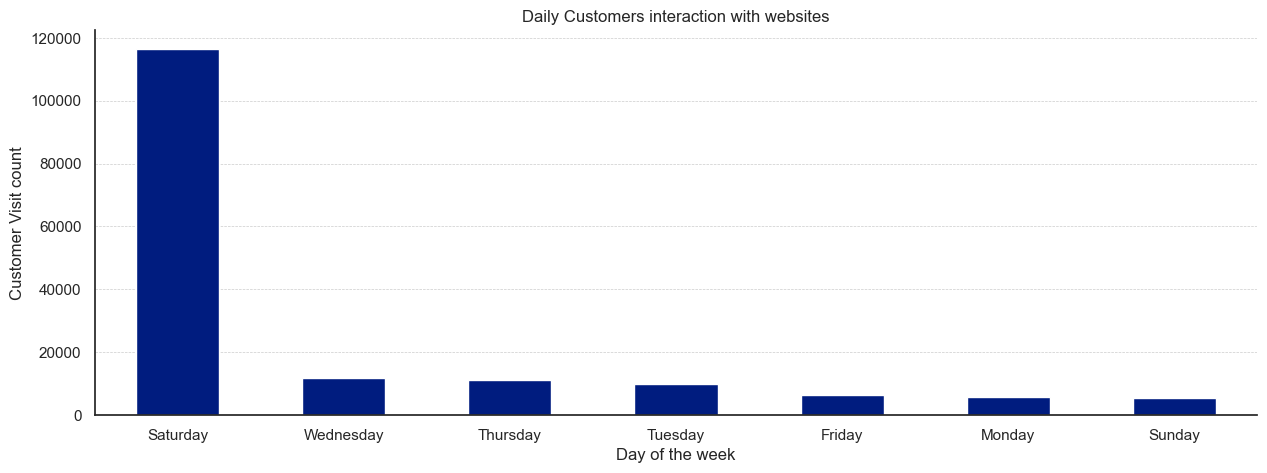

The website is <b>VISITED</b> mostly on <b>SATURDAY</b> while <b>SUNDAY</b> has the <b>LEAST VISIT</b>

In [43]:
ax = event_visit_type['timestamp'].dt.day_name().value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Daily Customers interaction with websites')
plt.xticks(rotation=0)
plt.xlabel('Day of the week')
plt.ylabel('Customer Visit count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
printmd('The website is <b>VISITED</b> mostly on <b>SATURDAY</b> while <b>SUNDAY</b> has the <b>LEAST VISIT</b>')

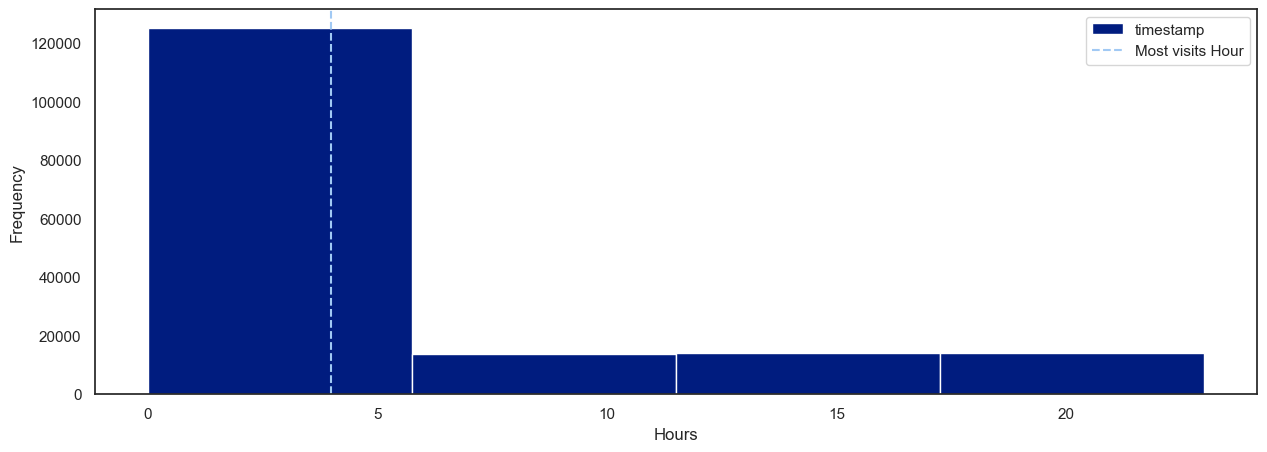

Customers visit the websites mostly during the <b>FIRST QUARTER</b> of the day which is between <b>12 AM</b> to <b>6 AM</b> and the **highest visit** being <b>4 AM</b>

In [44]:
ax = event_visit_type['timestamp'].dt.hour.plot(kind='hist',bins=4,figsize=(15,5))
mode_hour = new_data['timestamp'].dt.hour.mode()[0]
plt.axvline(mode_hour, color='b', linestyle='--', label='Most visits Hour')
plt.legend()
ax.set_xlabel('Hours')
plt.show()

printmd('Customers visit the websites mostly during the <b>FIRST QUARTER</b> of the day which is between <b>12 AM</b> to <b>6 AM</b> and the **highest visit** being <b>4 AM</b>')

#### Visited and Checkedout

In [45]:
visit_status = event_visit_type.groupby('status')['customer_id'].nunique()
fig = go.Figure(data=go.Pie(labels=visit_status.index, values=visit_status, hole=0.5))
fig.update_layout(title = 'Customers that Visited and Checked out with their order status')
fig.show()

In [46]:
printmd('Out of the **1000 customers**, **9165** orders were placed, **successful transaction (32.7%)**, **failed transaction (33.6%)** while **cancelled (33.7%)** ')
printmd('The likelihood of a customer visiting and successfully purchasing a product is low as the amount of failed and cancelled are more than the number of success')

Out of the **1000 customers**, **9165** orders were placed, **successful transaction (32.7%)**, **failed transaction (33.6%)** while **cancelled (33.7%)** 

The likelihood of a customer visiting and successfully purchasing a product is low as the amount of failed and cancelled are more than the number of success

#### Continents and Countries of visits

In [47]:
visit_country = event_visit_type.groupby('continent')['customer_id'].nunique().sort_values(ascending=False)
percentages = get_percentages(visit_country)
fig = go.Figure(data=go.Bar(x=visit_country.index, y=visit_country.values, text=percentages.apply(lambda y :str(y) + '%')))
fig.update_layout(title = 'Visit with Status count of customers')
fig.show()

In [48]:
printmd(f'Most of the visits to the website are customers from **{percentages.index[0]} ({percentages.values[0]}%)**,**{percentages.index[1]} ({percentages.values[1]}%)** and **{percentages.index[2]}({percentages.values[2]}%)** making the **top 3** of the continents that visits the website')

printmd("Customers from **Africa**, are the **highest visitor**, followed by Asian customers and Europe, the place where customers are least is the Antarctica, This is expected as the amount of counrties in Africa are more than than Asia and Asia are more than others")

Most of the visits to the website are customers from **Africa (22.72%)**,**Asia (21.49%)** and **Europe(19.82%)** making the **top 3** of the continents that visits the website

Customers from **Africa**, are the **highest visitor**, followed by Asian customers and Europe, the place where customers are least is the Antarctica, This is expected as the amount of counrties in Africa are more than than Asia and Asia are more than others

In [49]:
product_visit = pd.pivot(data=event_visit_type, values='product_name', columns='country').mode().stack()[0]
printmd('Each <b>COUNTRY</b> and the product customers <b>VISITED THE MOST</b>:\n')
product_visit.reset_index(name='most visited product')

Each <b>COUNTRY</b> and the product customers <b>VISITED THE MOST</b>:


,country,most visited product
0,Afghanistan,Canon EOS R5 Camera
1,Albania,Samsung Galaxy S21
2,Algeria,Sony PlayStation 5
3,American Samoa,Microsoft Xbox Series X
4,Andorra,Canon EOS R5 Camera
...,...,...
238,Wallis and Futuna,Apple iPhone 13
239,Western Sahara,Sony WH-1000XM4 Headphones
240,Yemen,Microsoft Xbox Series X
241,Zambia,Canon EOS R5 Camera


#### Most visited brand and Products

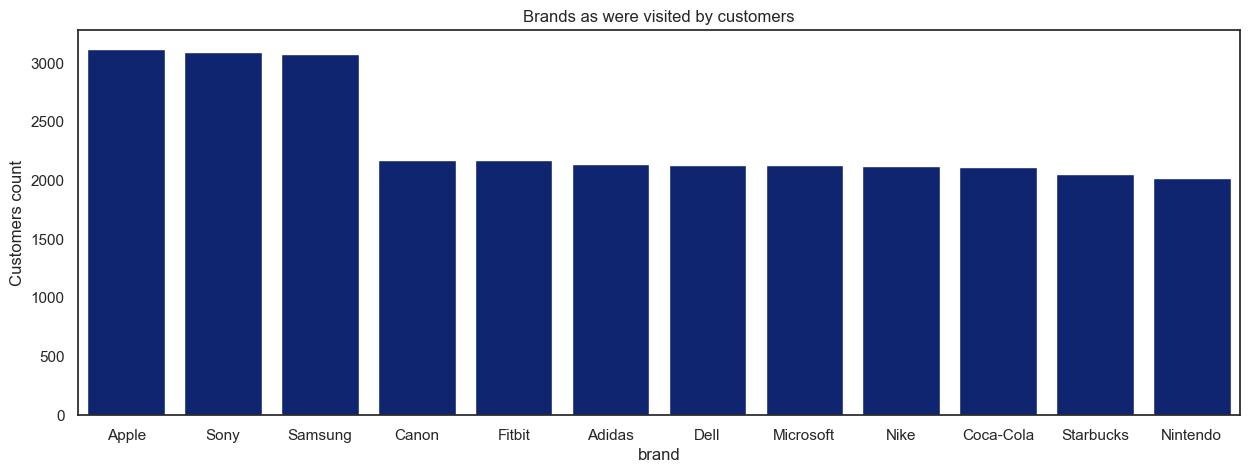

In [50]:
brand_customers_visit = event_visit_type.groupby('brand')\
['customer_id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(brand_customers_visit)
ax.set_title('Brands as were visited by customers')
ax.set_ylabel('Customers count')
plt.show()

In [51]:
printmd('During the customers visit, **Apple, Sony and Samsung** brands are the **most interacted with**. As such it is advised that ShopSmart get **more products from these brands** can generate more revenue')

During the customers visit, **Apple, Sony and Samsung** brands are the **most interacted with**. As such it is advised that ShopSmart get **more products from these brands** can generate more revenue

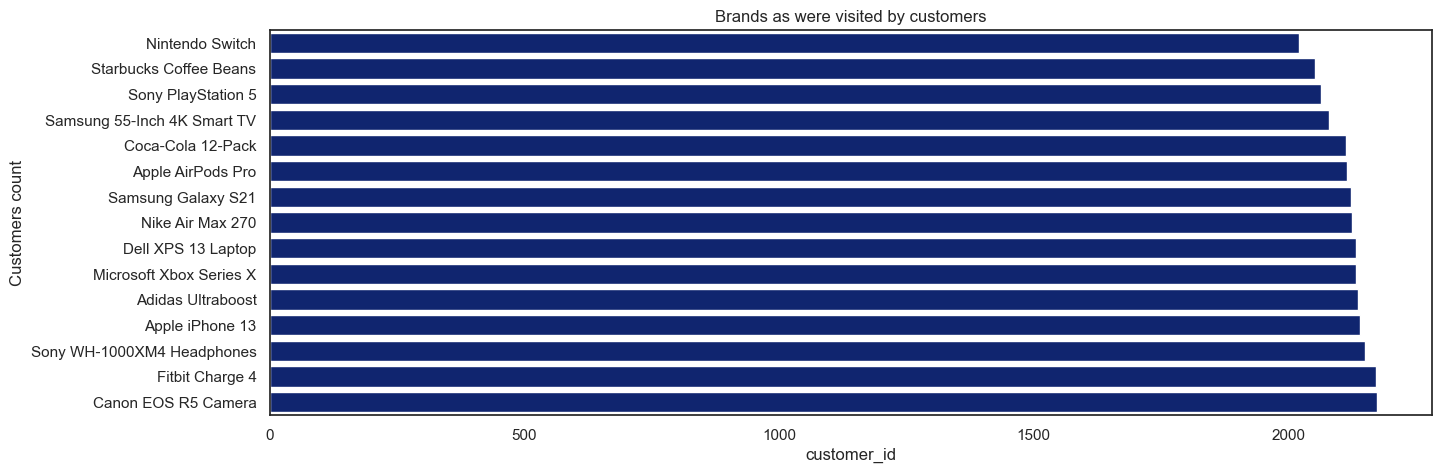

The visit difference between the  products are not quite much so it can be said that all ShopSmart Products are wanted by the customers


In [52]:
brand_customers_visit = event_visit_type.groupby('product_name')\
['customer_id'].nunique().sort_values()
plt.figure(figsize=(15,5))
ax = sns.barplot(brand_customers_visit,orient='h')
ax.set_title('Brands as were visited by customers')
ax.set_ylabel('Customers count')
plt.show()
print("The visit difference between the  products are not quite much so it can be said that all ShopSmart Products are wanted by the customers")

#### Percentage Completion Rate

In [53]:

checkedout = new_data[(new_data['event_type'] == 'checkout')]

status_counts = checkedout.groupby('status')['order_id'].nunique()

fig = go.Figure(data=go.Pie(
    labels=status_counts.index,
    values=status_counts, hole=0.5))


fig.update_layout(title='Customer\'s Transaction Purchase Status Rate')

fig.show()


#### Most visited Products by Country and Continent

In [54]:
printmd('Each <b>CONTINENT</b> and the product customers <b>VISITED THE MOST</b>:\n')
display(product_visit.reset_index(name='most visited product'))
print('')

Each <b>CONTINENT</b> and the product customers <b>VISITED THE MOST</b>:


,country,most visited product
0,Afghanistan,Canon EOS R5 Camera
1,Albania,Samsung Galaxy S21
2,Algeria,Sony PlayStation 5
3,American Samoa,Microsoft Xbox Series X
4,Andorra,Canon EOS R5 Camera
...,...,...
238,Wallis and Futuna,Apple iPhone 13
239,Western Sahara,Sony WH-1000XM4 Headphones
240,Yemen,Microsoft Xbox Series X
241,Zambia,Canon EOS R5 Camera


In [55]:
product_visit = pd.pivot(data=event_visit_type, values='brand',
                         columns='continent').mode().stack()[0]
product_checkout = pd.pivot(data=checkedout, values='brand',
                            columns='continent').mode().stack()[0]
product_result = pd.concat([product_visit,product_checkout],axis=1,
                           ignore_index=True,names=['visit','checkout'])

printmd('Each **CONTINENT** and the product customers **VISITED THE MOST**:\n')
display(product_result.reset_index().rename(columns={'level_0': 'continent', 0: 'most visited brand',1:'most checked out'}))
print('')
printmd('Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.')

Each **CONTINENT** and the product customers **VISITED THE MOST**:


,continent,most visited brand,most checked out
0,Africa,Apple,Apple
1,Antarctica,Samsung,Samsung
2,Asia,Apple,Apple
3,Europe,Sony,Samsung
4,North America,Samsung,Sony
5,Oceania,Samsung,Apple
6,Other Islands,Samsung,Samsung
7,South America,Apple,Sony


Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.

<a id="3.2"></a>
### 3.2 Location Analysis:
- What is the customer's location based on the provided data?
- How might the customer's location influence their purchasing behavior?


#### customers location

In [56]:
new_data.groupby('country')['customer_id'].nunique().sort_values(ascending=False)[:10]


country
Korea         82
Congo         78
Guatemala     58
Argentina     58
Bangladesh    58
Myanmar       58
China         56
Kiribati      56
Finland       55
Mauritius     55
Name: customer_id, dtype: int64

country
Korea               0.82
Congo               0.78
Guatemala           0.58
Argentina           0.58
Bangladesh          0.58
                    ... 
French Polynesia    0.27
Montenegro          0.27
Italy               0.27
Chad                0.25
Uganda              0.23
Name: customer_id, Length: 243, dtype: float64

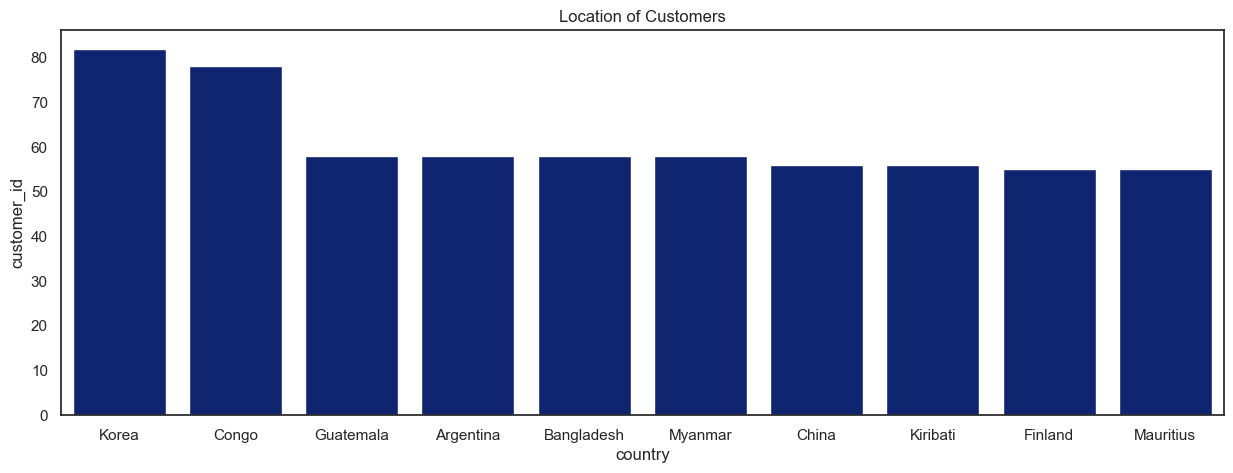

In [57]:
new_data_location = new_data.groupby('country')['customer_id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(new_data_location[:10])
percentages = get_percentages(new_data_location)
display(percentages)
plt.title('Location of Customers')
plt.show()

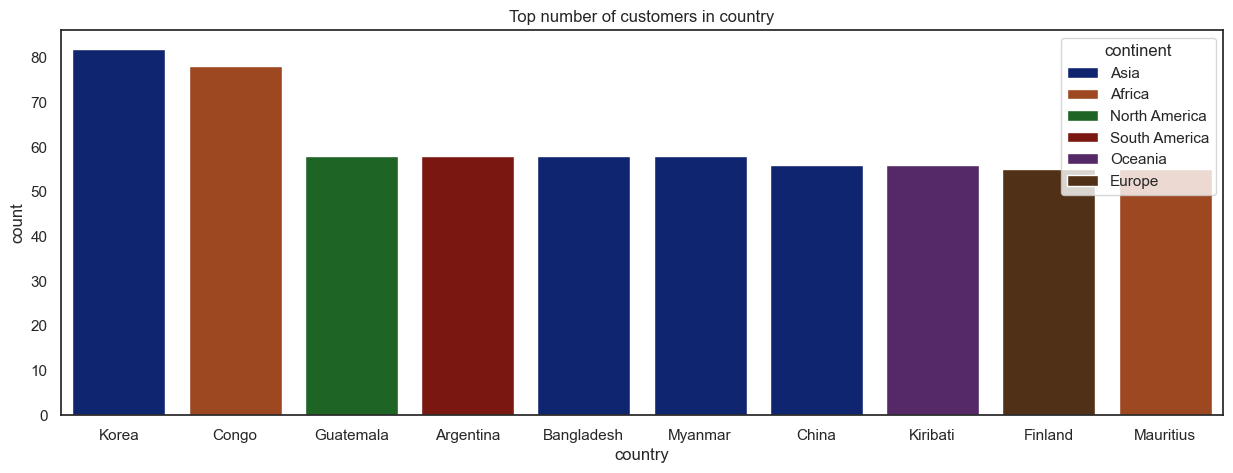

,country,continent,count,percentages
0,Korea,Asia,82,0.82
1,Congo,Africa,78,0.78
2,Guatemala,North America,58,0.58
3,Argentina,South America,58,0.58
4,Bangladesh,Asia,58,0.58
...,...,...,...,...
238,French Polynesia,Oceania,27,0.27
239,Montenegro,Europe,27,0.27
240,Italy,Europe,27,0.27
241,Chad,Africa,25,0.25


In [60]:
new_data_location = new_data.groupby(['country','continent'])['customer_id'].nunique().sort_values(ascending=False).reset_index(name='count')
plt.figure(figsize=(15,5))
sns.barplot(new_data_location[:10], x='country', y = 'count', hue='continent')
plt.title('Top number of customers in country')
plt.show()
new_data_location['percentages'] = new_data_location['count'].div(new_data_location['count'].sum())*100

display(new_data_location)

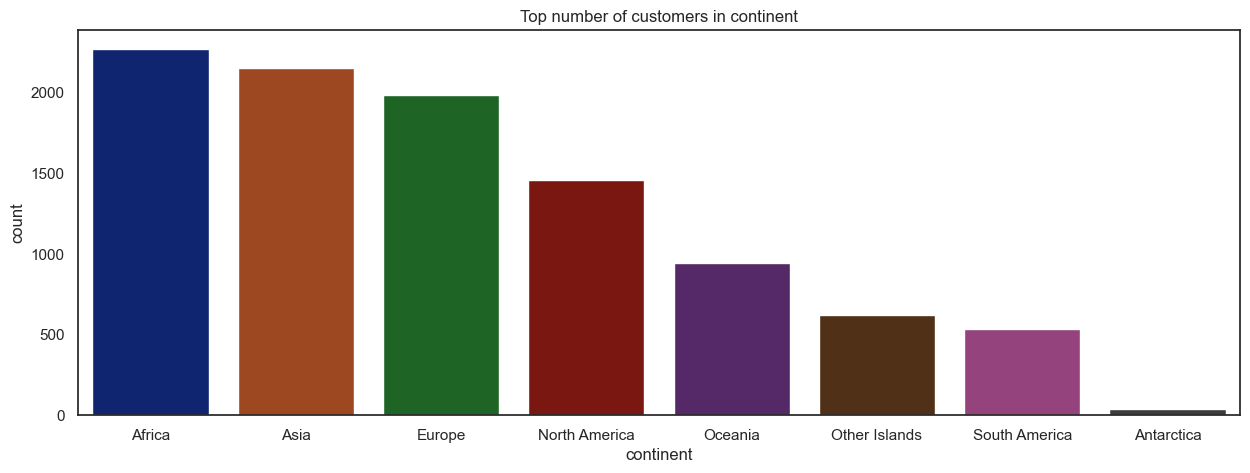

,continent,count,percentages
0,Africa,2272,22.72
1,Asia,2149,21.49
2,Europe,1982,19.82
3,North America,1458,14.58
4,Oceania,945,9.45
5,Other Islands,621,6.21
6,South America,537,5.37
7,Antarctica,36,0.36


In [61]:
new_data_location = new_data.groupby(['continent'])['customer_id'].nunique().sort_values(ascending=False).reset_index(name='count')
plt.figure(figsize=(15,5))
sns.barplot(new_data_location[:10], x='continent', y = 'count', hue='continent')
plt.title('Top number of customers in continent')
plt.show()
new_data_location['percentages'] = new_data_location['count'].div(new_data_location['count'].sum())*100

display(new_data_location)

In [62]:
printmd(f"Out of the **{new_data['country'].unique().shape[0]}** Countries, **22.72%** of them are **Africans**, followed by **Asia** with **21.49%** of the customers while **Antarctica (0.36)%** which is the least")

Out of the **243** Countries, **22.72%** of them are **Africans**, followed by **Asia** with **21.49%** of the customers while **Antarctica (0.36)%** which is the least

#### Successful Order by Continent

In [99]:
# order by continent
plt.figure(figsize=(15,5))
result = new_data[new_data['status'] == 'success'].groupby('continent')['order_id'].nunique().sort_values(ascending=False)[:10]
percentages = get_percentages(result)
fig = px.bar(x=result.index,y=result.values,text=percentages.apply(lambda x :str(x) + '%'))

fig.update_layout(title='Customers with Successful Order by Continent',xaxis_title='Continent',yaxis_title='Count')
fig.show()

<Figure size 1500x500 with 0 Axes>

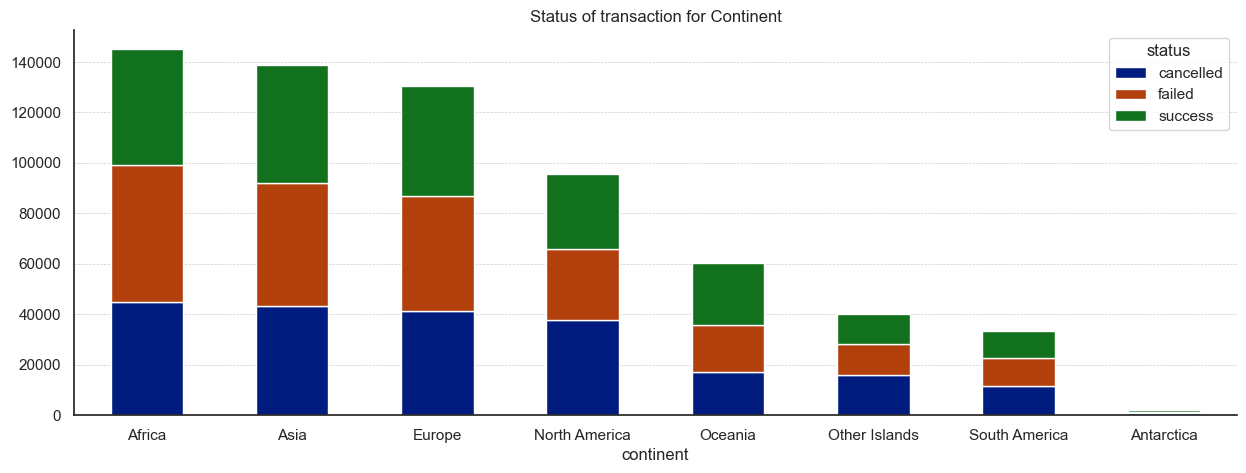

Cancelled, Failed and Success Status of order are fairly the same from each continent

In [107]:
ax = new_data.groupby('continent')['status'].value_counts().unstack().sort_values(by=['failed','cancelled','success'], ascending=False).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.title('Status of transaction for Continent')
plt.show()
printmd('Cancelled, Failed and Success Status of order are fairly the same from each continent')


In [101]:
# order by continent
plt.figure(figsize=(15,5))
result = new_data[new_data['status'] == 'success'].groupby('country')['order_id'].nunique().sort_values(ascending=False)[:10]
percentages = get_percentages(result)
fig = px.bar(x=result.index,y=result.values,
             text=percentages.apply(lambda x :str(x) + '%'))

fig.update_layout(title='Top 10 Successful Order by Country',xaxis_title='Country',yaxis_title='Count')
fig.show()

<Figure size 1500x500 with 0 Axes>

#### Places where order comes from

In [108]:
for country in all_countries:
    if country['Country Name'] == 'Democratic Republic of Congo':
        print(country)

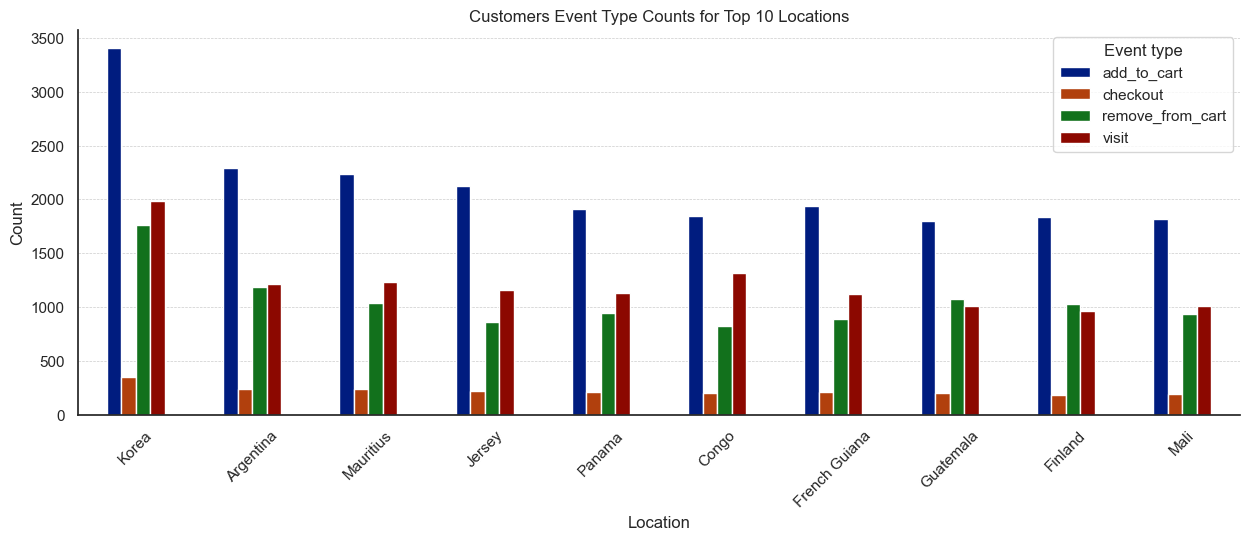

In [110]:
res = new_data.groupby(['country','event_type']).size().unstack()
res_total = res.sum(1).sort_values(ascending=False)
res = res.reindex(res_total.index)


ax = res[:10].plot(kind='bar', stacked=False,figsize=(15,5)) #plot top 10 locations and their status
plt.xlabel('Location')
plt.ylabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.title('Customers Event Type Counts for Top 10 Locations')
plt.legend(title='Event type')
plt.show()

#### Most Added to cart and Removed Product

In [111]:
added_removed('brand')
added_removed('product_name')

Each **CONTINENT** and the product customers **ADDED TO AND REMOVED FROM CART**:


,continent,added to cart,removed from cart
0,Africa,Sony,Sony
1,Antarctica,Apple,Samsung
2,Asia,Apple,Apple
3,Europe,Samsung,Samsung
4,North America,Sony,Sony
5,Oceania,Samsung,Samsung
6,Other Islands,Samsung,Samsung
7,South America,Sony,Sony


Each **CONTINENT** and the product customers **ADDED TO AND REMOVED FROM CART**:


,continent,added to cart,removed from cart
0,Africa,Canon EOS R5 Camera,Canon EOS R5 Camera
1,Antarctica,Coca-Cola 12-Pack,Samsung 55-Inch 4K Smart TV
2,Asia,Samsung Galaxy S21,Samsung Galaxy S21
3,Europe,Fitbit Charge 4,Fitbit Charge 4
4,North America,Canon EOS R5 Camera,Canon EOS R5 Camera
5,Oceania,Fitbit Charge 4,Fitbit Charge 4
6,Other Islands,Samsung 55-Inch 4K Smart TV,Microsoft Xbox Series X
7,South America,Dell XPS 13 Laptop,Dell XPS 13 Laptop


In [112]:
printmd('Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.')

Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.

continent,Africa,Antarctica,Asia,Europe,North America,Oceania,Other Islands,South America
status,,,,,,,,
cancelled,6515,120,6365,6094,5607,2625,2328,1731
failed,7897,105,7349,6625,4100,2688,1723,1620
success,7080,94,6902,6463,4382,3592,1817,1633


**Successful** - Based on Location **Oceania** has the most purchase quantity followed by **Asia** and **Europe**\
**Cancelled** - The most are from **North America**, **Other Islands** and **South America**\
**Failed** - The failed purchased quantity comes from **Africa**, **Asia** and **Europe** 

### Overall Purchase Behavior: 
<a id='3.3'></a>

- Based on the data provided, what insights can you draw about this customer's overall behavior on the website?

- How might these insights inform marketing strategies or personalized recommendations for this customer?


Customers may wish to purchase products that are the most visited in their country or continents

In [77]:
printmd(f'The time for **most checkout** is within **{checkedout["checked_out_at"].dt.hour.value_counts().index[0]} AM**')

The time for **most checkout** is within **4 AM**

#### Sum of Product Quantity Checked out

In [119]:
continent_status_rate = pd.pivot_table(
    data=new_data[new_data['event_type'] == 'checkout'],
    columns='continent', values='quantity',index = 'status',aggfunc='sum')
continent_status_rate

# Calculate percentages
total_counts = continent_status_rate.sum(axis=0)
percentages = (continent_status_rate.div(total_counts, axis=1) * 100).round(2)

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=continent_status_rate.values,
    x=percentages.columns,
    y=percentages.index,
    colorscale='oryel',
    colorbar=dict(title='Percentage')
))

for i in range(len(percentages.index)):
    for j in range(len(percentages.columns)):
        fig.add_annotation(
            x=percentages.columns[j],
            y=percentages.index[i],
            text=str(percentages.values[i, j]) + '%',
            showarrow=False,
            font=dict(color='white'))

# Update layout
fig.update_layout(
    title='Successsfuly Ordered Product Quantity by Continent',
    xaxis_title='Continent',
    yaxis_title='Status'
)

# Show figure
fig.show()


In [138]:
res = new_data.groupby('currency')['customer_id'].nunique()
fig = px.pie(values=res.values,hole=0.5,hover_name=res.index, names=res.index)
fig.update_layout(title = 'Currency Customers Purchased with')
fig.show()
# continue here

#### Currency Customers make payment in correlation with Status

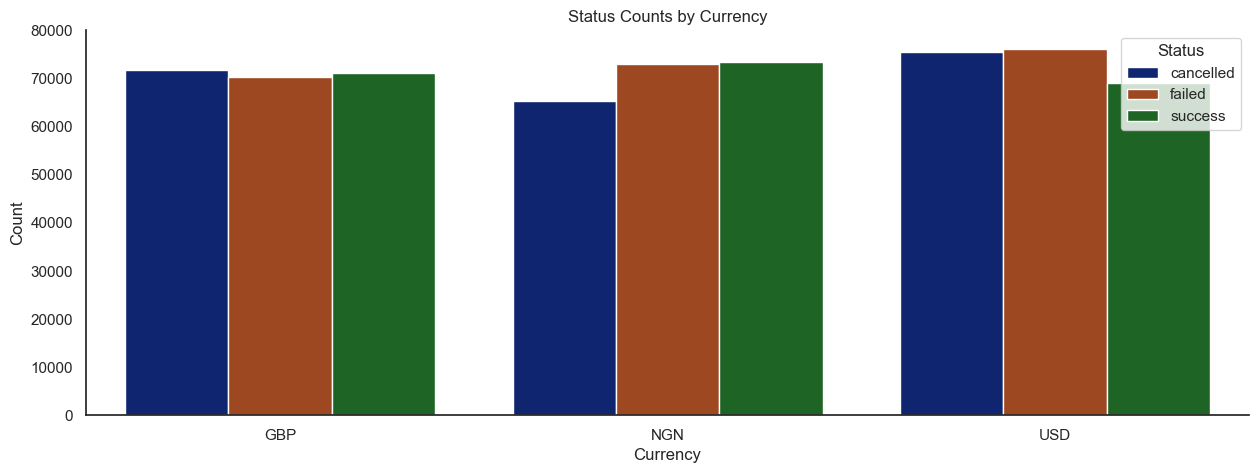

In [139]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=new_data.groupby(['currency', 'status']).size().reset_index(), x='currency', y=0, hue='status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Currency')
plt.ylabel('Count')
plt.title('Status Counts by Currency')
plt.legend(title='Status')
plt.show()


Though the difference on some of the currency used in transaction is not quite much for GBP and NGN, NAIRA shows to be the most consistent followed by GBP and USD the last.

#### Removed From Cart

In [141]:
removed_from_cart = new_data[new_data['event_type'] == 'remove_from_cart'].groupby(['product_name'])['customer_id'].nunique().sort_values()
printmd(f'**Total Removed Product = {removed_from_cart.sum()}**')
printmd('**Product removed from Cart Percentage:**')
removed_from_cart/removed_from_cart.sum()*100

**Total Removed Product = 30870**

**Product removed from Cart Percentage:**

product_name
Nintendo Switch                6.397797
Starbucks Coffee Beans         6.475543
Sony PlayStation 5             6.501458
Samsung 55-Inch 4K Smart TV    6.585682
Apple AirPods Pro              6.653709
Coca-Cola 12-Pack              6.676385
Apple iPhone 13                6.679624
Adidas Ultraboost              6.689342
Microsoft Xbox Series X        6.695821
Samsung Galaxy S21             6.699061
Dell XPS 13 Laptop             6.715258
Nike Air Max 270               6.741173
Sony WH-1000XM4 Headphones     6.757370
Canon EOS R5 Camera            6.857791
Fitbit Charge 4                6.873988
Name: customer_id, dtype: float64

In [142]:
printmd('The most removed from cart Product from is **fitbit charge 4(6.87%)** and the least removed is **Nintendo Switch (6.4%)**' )

The most removed from cart Product from is **fitbit charge 4(6.87%)** and the least removed is **Nintendo Switch (6.4%)**

In [143]:
get_max_n_min_product('visit','visited')

The ***most visited brand*** is **Apple**

The ***least visited brand*** is **Nintendo**

The ***most visited product*** is **Canon EOS R5 Camera**

The ***least visited product*** is **Nintendo Switch**

In [144]:
get_max_n_min_product('add_to_cart','added to cart')

The ***most added to cart brand*** is **Apple**

The ***least added to cart brand*** is **Nintendo**

The ***most added to cart product*** is **Canon EOS R5 Camera**

The ***least added to cart product*** is **Nintendo Switch**

In [145]:
get_max_n_min_product('remove_from_cart','removed from cart')

The ***most removed from cart brand*** is **Samsung**

The ***least removed from cart brand*** is **Nintendo**

The ***most removed from cart product*** is **Canon EOS R5 Camera**

The ***least removed from cart product*** is **Nintendo Switch**

In [84]:
get_max_n_min_product('checkout','checked out')

The ***most checked out brand*** is **Apple**

The ***least checked out brand*** is **Nintendo**

The ***most checked out product*** is **Canon EOS R5 Camera**

The ***least checked out product*** is **Nintendo Switch**

##### The most visted items is also the most added, most removed and Checked out, Customers are more likely to visit the Canon EOS R5 Camera

The **most visited brands** are **Apple** and it the **most checked out** brand but are not the most checked out Product

It is obvious that Customers love purchasing the **Canon EOS R5 Camera** product from the **Canon** brand but **Apple** Products still remains the lead in the **Most Checked Out Brand**

In [153]:
most_revenue_by_brand = new_data[(new_data['status'] == 'success') & (new_data['event_type'] == 'checkout')].groupby('brand')['total_order_price'].sum().sort_values(ascending=False)
percentages = get_percentages(most_revenue_by_brand)
fig = px.bar(x=most_revenue_by_brand.index, y=most_revenue_by_brand.values, text=percentages.apply(lambda y :str(y) + '%'), height=400, width=900)
fig.update_layout(title='Successfully Purchased Brands and Their Revenue')
fig.update_yaxes(title_text='Revenue')
fig.update_xaxes(title_text='Product')
fig.show()


**Canon** is the brand that **generate the most revenue** followed by ***Samsung*** while **Starbucks and Coca-Cola**
are the least revenue generating brands

In [154]:
result = checkedout_only[checkedout_only['status'] == 'success'].groupby('product_name')['total_order_price'].sum().sort_values(ascending=False)
percentages = get_percentages(result)
fig = px.bar(x=result.index, y=result.values, text=percentages.apply(lambda y :str(y) + '%'), height=400, width=900)
fig.update_layout(title='Successfully Purchased Product and Their Revenue')
fig.update_yaxes(title_text='Revenue')
fig.update_xaxes(title_text='Product')
fig.show()


Canon is the Lead Revenue genrator due to its price, though it's orice is in the high ranged prices, Customers still get due to various reasons which can be examined in future analysis

#### Total Revenue from Products Successfully Purchased 

In [146]:
successful_checkedout_country_total = new_data[(new_data['status'] == 'success') & (new_data['event_type'] == 'checkout')].groupby(['country','continent'])[['total_order_price']].sum().sort_values(by='total_order_price', ascending=False).reset_index()
successful_checkedout_country_total

,country,continent,total_order_price
0,Singapore,Asia,252274.67
1,Korea,Asia,247149.42
2,Mauritius,Africa,241841.76
3,Bosnia and Herzegovina,Europe,222098.53
4,Rwanda,Africa,217881.10
...,...,...,...
238,Comoros,Africa,11169.89
239,Uruguay,South America,8513.70
240,Kyrgyz Republic,Asia,6697.77
241,Malaysia,Asia,2119.96


#### Top 10 Country Revenue

Text(0.5, 1.0, 'Top 10 Countries in Revenue')

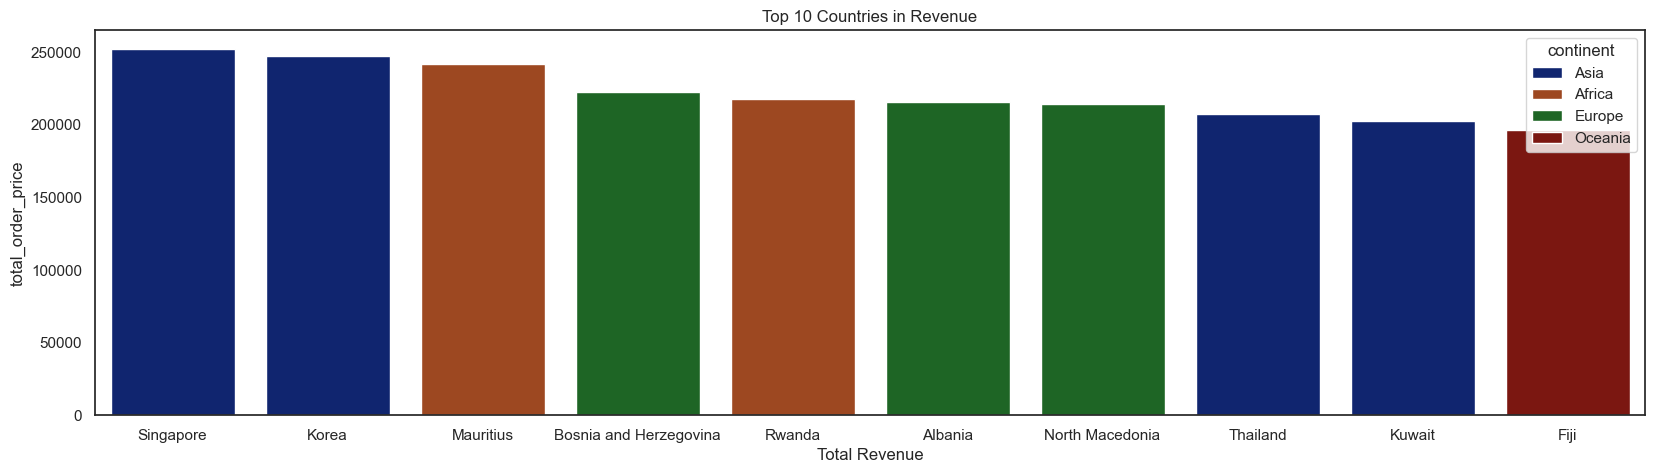

In [147]:
plt.figure(figsize=(20,5))
sns.barplot(data=successful_checkedout_country_total[:10],x='country',y='total_order_price',hue='continent')
plt.xlabel('Total Revenue')
plt.title('Top 10 Countries in Revenue')

#### Checkouts and Revenue with respect to number of transaction days

<Axes: xlabel='number_of_days_transaction'>

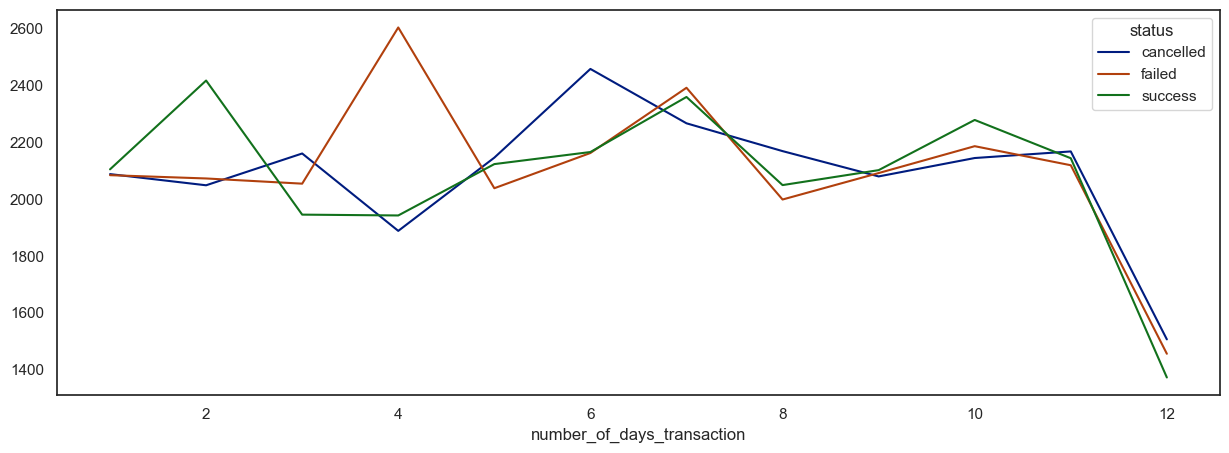

In [88]:
checkedout_only = new_data[(new_data['event_type'] =='checkout')]
result = checkedout_only.groupby(['number_of_days_transaction','status'])['total_order_price'].mean().unstack()
result.plot(kind='line',figsize=(15,5))
# plt.xlabel('')
# plt.ylabel('NUmber of days')
plt.title('Number of days required to complete transaction by customers')

Many Customers who use than an average of **2 days** complete their transaction successfully  
Transactions on **day 4** to **day 6** are likely to get **cancelled or fail**  
Transactions of more than **2 days** should be reminded Customers about their purchase so they dont forget

#### Successfully Checked out Products and Revenue

,continent,number_of_days_transaction
5,Oceania,5.089256
0,Africa,5.061773
4,North America,4.816794
3,Europe,4.808093
2,Asia,4.737913
6,Other Islands,4.632549
7,South America,4.240583
1,Antarctica,2.583333


<Axes: xlabel='continent', ylabel='number_of_days_transaction'>

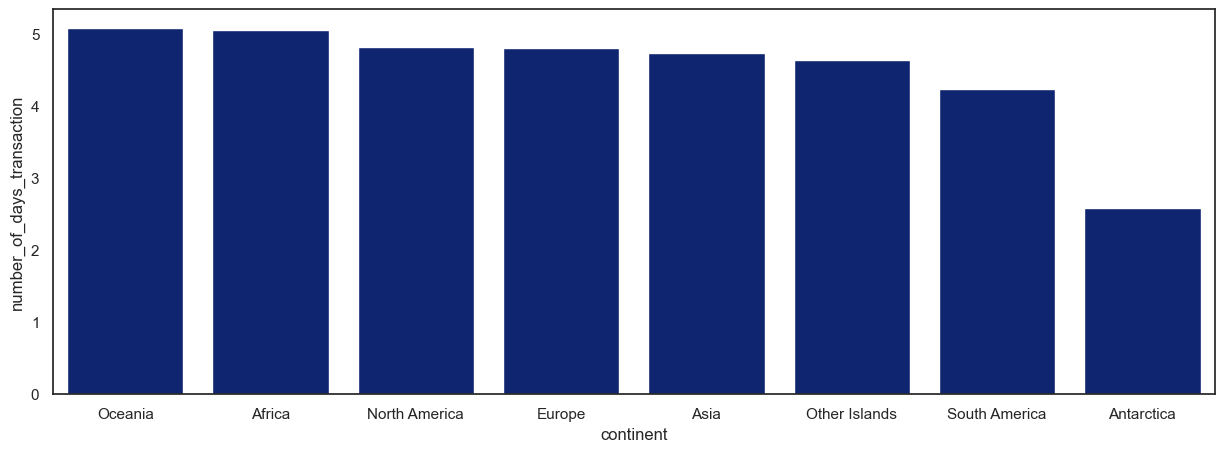

In [91]:
result = checkedout_only.groupby(['continent'])['number_of_days_transaction'].mean().reset_index().sort_values('number_of_days_transaction', ascending=False)
display(result)
plt.figure(figsize=(15,5))
sns.barplot(result,x='continent',y='number_of_days_transaction')

Text(160.25, 0.5, 'Number of Days')

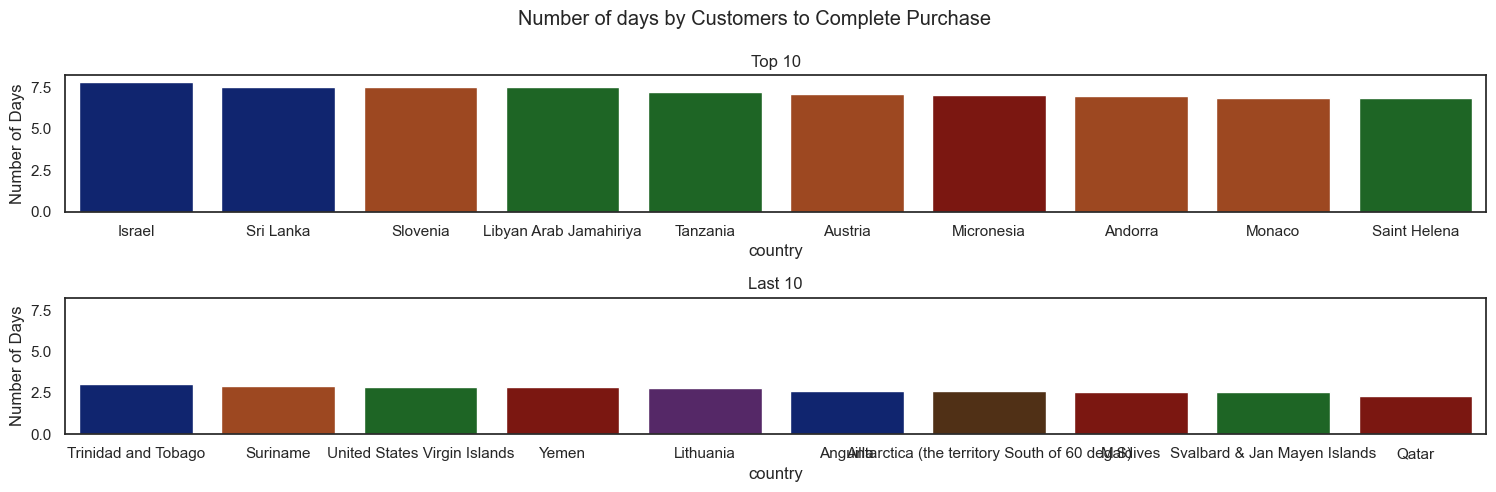

In [92]:
result = checkedout_only.groupby(['country','continent'])['number_of_days_transaction'].mean().reset_index().sort_values('number_of_days_transaction', ascending=False)
result
fig, axes = plt.subplots(2,1, figsize=(15,5), sharey=True)
axes = axes.flatten()
sns.barplot(result[:10],x='country',y='number_of_days_transaction', hue='continent',ax=axes[0],legend=False).set_title('Top 10')
sns.barplot(result.tail(10),x='country',y='number_of_days_transaction', hue='continent',ax=axes[1],legend=False).set_title('Last 10')
plt.suptitle('Number of days by Customers to Complete Purchase')
plt.tight_layout()
axes[0].set_ylabel('Number of Days')
axes[1].set_ylabel('Number of Days')

It is observed that **Isreali , Sri Lankans (Asia), Slovenia (Europe), Libya (Africa)** takes the highest average of Days  
**Qatar (Africa), Svalbard and Jan Mayen Islands (Other Islands), Maldives (Asia)** takes the least days to complete purchase

Creating of **discount/vouchers** which will help them to complete transactions should be introduced,
Customers from Continents and Countries that **take less time** should be able to **improve their service** e.g. speeding up support incase there is a required service from the support department can help keep these customers in making purchase in little timeframe

#### Customer with the highest Revenue

In [159]:
success_checkout = new_data[(new_data['status'] == 'success')&(new_data['event_type'] == 'checkout')]

In [166]:
success_checkout.groupby('customer_id')['total_order_price'].sum().sort_values(ascending=False)#.index[:3]

customer_id
bb7fd0af-3254-455b-b705-0241ab25df41    41417.41
df4cf418-6255-4d2f-8ad5-883218ad48e6    41129.38
3c8e3261-bb06-4452-9342-11850addf518    41129.37
662af3bb-cd98-42b8-a299-6b42c23821e6    40451.58
90e76254-adc5-4b89-9c3b-c23fd5a60df7    40249.41
                                          ...   
fd960258-4652-4674-8f37-a7925cd5879e       29.95
655402da-d6bc-4a36-8832-9ed2c23bb824       29.95
2ea8d429-2acd-45be-867c-9098c4f97b84       29.95
8ef3e5a2-ca5e-49ba-9fba-591bf567f6ad       23.96
af42c4ab-8cba-4cf6-afcf-5bcfe7234b55       17.97
Name: total_order_price, Length: 1548, dtype: float64

In [165]:
top3_customers = success_checkout.groupby('customer_id')['total_order_price'].sum().sort_values(ascending=False).index[:3]

Index(['bb7fd0af-3254-455b-b705-0241ab25df41',
       'df4cf418-6255-4d2f-8ad5-883218ad48e6',
       '3c8e3261-bb06-4452-9342-11850addf518'],
      dtype='object', name='customer_id')

In [163]:
new_data[new_data['customer_id'] == 'bb7fd0af-3254-455b-b705-0241ab25df41']

,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type,day,continent,price_range,brand,number_of_days_transaction,total_order_price
91149,bb7fd0af-3254-455b-b705-0241ab25df41,be41b69f-cb17-46e5-875c-59411c57f749,Taiwan,NGN,77042,70441ff8-b2a8-47ac-94fe-2756ed6d9591,success,2024-03-30 04:09:13.742352,2,Microsoft Xbox Series X,499.99,2024-03-23 05:05:03.015109,visit,Saturday,Asia,mid,Microsoft,10.0,999.98
91150,bb7fd0af-3254-455b-b705-0241ab25df41,be41b69f-cb17-46e5-875c-59411c57f749,Taiwan,NGN,77043,70441ff8-b2a8-47ac-94fe-2756ed6d9591,success,2024-03-30 04:09:13.742352,2,Microsoft Xbox Series X,499.99,2024-03-20 17:56:37.333405,visit,Wednesday,Asia,mid,Microsoft,10.0,999.98
91151,bb7fd0af-3254-455b-b705-0241ab25df41,be41b69f-cb17-46e5-875c-59411c57f749,Taiwan,NGN,77044,70441ff8-b2a8-47ac-94fe-2756ed6d9591,success,2024-03-30 04:09:13.742352,2,Microsoft Xbox Series X,499.99,2024-03-21 01:43:10.089022,visit,Thursday,Asia,mid,Microsoft,10.0,999.98
91152,bb7fd0af-3254-455b-b705-0241ab25df41,be41b69f-cb17-46e5-875c-59411c57f749,Taiwan,NGN,77045,70441ff8-b2a8-47ac-94fe-2756ed6d9591,success,2024-03-30 04:09:13.742352,2,Microsoft Xbox Series X,499.99,2024-03-30 04:03:13.742274,visit,Saturday,Asia,mid,Microsoft,10.0,999.98
91153,bb7fd0af-3254-455b-b705-0241ab25df41,be41b69f-cb17-46e5-875c-59411c57f749,Taiwan,NGN,77046,70441ff8-b2a8-47ac-94fe-2756ed6d9591,success,2024-03-30 04:09:13.742352,2,Microsoft Xbox Series X,499.99,2024-03-30 04:03:13.742275,visit,Saturday,Asia,mid,Microsoft,10.0,999.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631172,bb7fd0af-3254-455b-b705-0241ab25df41,be41b69f-cb17-46e5-875c-59411c57f749,Taiwan,NGN,77063,70441ff8-b2a8-47ac-94fe-2756ed6d9591,success,2024-03-30 04:09:13.742352,5,Sony PlayStation 5,499.99,2024-03-30 04:03:13.742345,remove_from_cart,Saturday,Asia,mid,Sony,10.0,2499.95
631173,bb7fd0af-3254-455b-b705-0241ab25df41,be41b69f-cb17-46e5-875c-59411c57f749,Taiwan,NGN,77064,70441ff8-b2a8-47ac-94fe-2756ed6d9591,success,2024-03-30 04:09:13.742352,5,Sony PlayStation 5,499.99,2024-03-30 04:03:13.742346,add_to_cart,Saturday,Asia,mid,Sony,10.0,2499.95
631174,bb7fd0af-3254-455b-b705-0241ab25df41,be41b69f-cb17-46e5-875c-59411c57f749,Taiwan,NGN,77065,70441ff8-b2a8-47ac-94fe-2756ed6d9591,success,2024-03-30 04:09:13.742352,5,Sony PlayStation 5,499.99,2024-03-30 04:03:13.742347,add_to_cart,Saturday,Asia,mid,Sony,10.0,2499.95
631175,bb7fd0af-3254-455b-b705-0241ab25df41,be41b69f-cb17-46e5-875c-59411c57f749,Taiwan,NGN,77066,70441ff8-b2a8-47ac-94fe-2756ed6d9591,success,2024-03-30 04:09:13.742352,5,Sony PlayStation 5,499.99,2024-03-30 04:03:13.742349,remove_from_cart,Saturday,Asia,mid,Sony,10.0,2499.95


<Axes: xlabel='product_name', ylabel='product_name'>

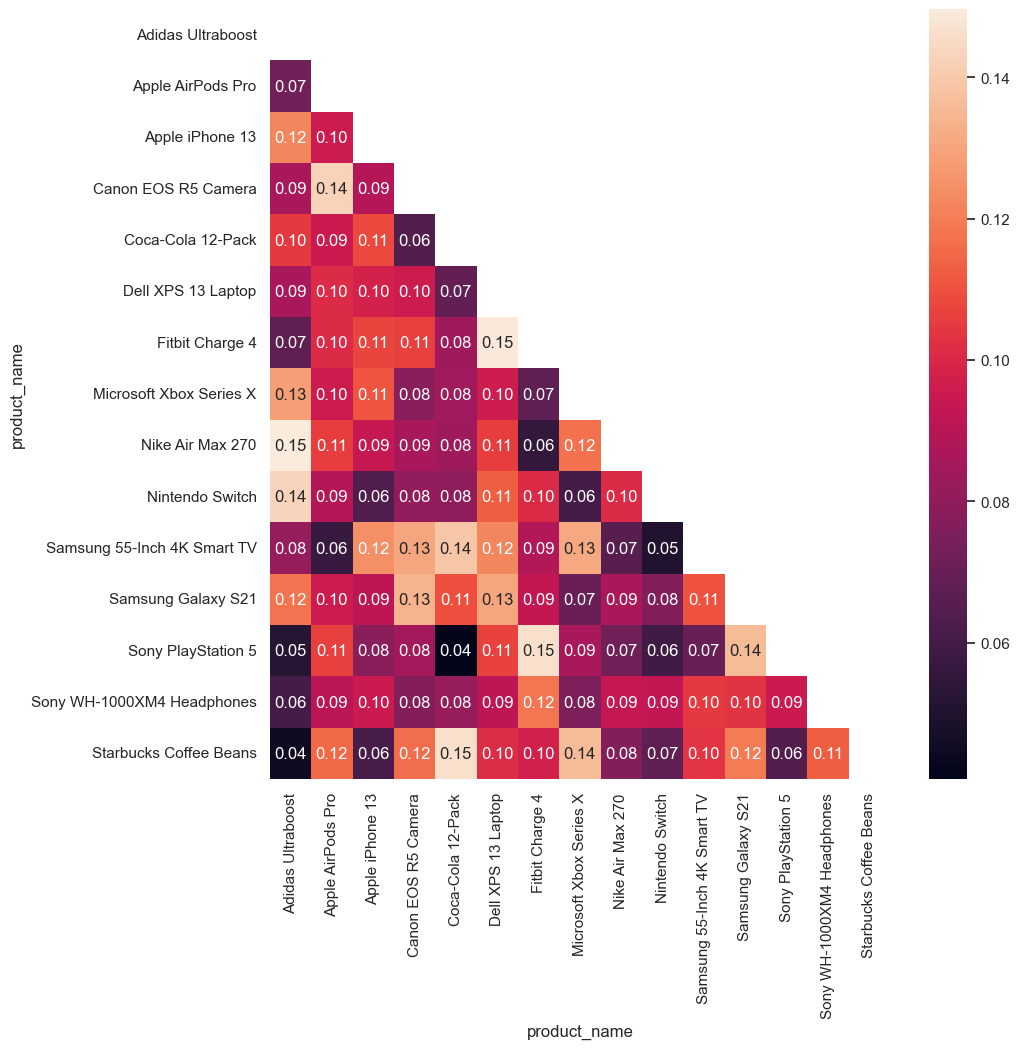

In [95]:
product_corr = pd.pivot_table(success_checkout,columns='product_name',index='customer_id',aggfunc='sum',values='quantity',fill_value=0).corr()
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(product_corr, dtype=bool))
sns.heatmap(product_corr,annot=True,fmt='.2f',mask=mask)
# product_corr

Correlation between the quantity of the products bought by customers
Some of the products that have **fair correlation** between 
- **Fitbit Charge 4** and **Sony Playstation**,
- **Coca-Cola 12-Pack** and **Starbucks**
- **Nike Air Max** and **Adidas Ultraboost**

In [96]:
df = new_data[(new_data['status'] == 'success') & (new_data['event_type'] == 'checkout')]


fig = go.Figure(data=go.Choropleth(
    locations = df['country'],
    locationmode='country names',
    z = df['total_order_price'],
    text = df['country'],
    hovertext='$'+df['total_order_price'].astype(str),
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'Revenue',
))

fig.update_layout(
    title_text='Revenue',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig.show()

In [97]:
df

,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type,day,continent,price_range,brand,number_of_days_transaction,total_order_price
74651,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14799,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,2,Microsoft Xbox Series X,499.99,2024-03-30 04:19:10.406794,checkout,Saturday,Africa,mid,Microsoft,4.0,999.98
74673,11f73687-45ab-4665-9b1a-14356a593623,aefb983d-2b30-4e1b-97c1-3816f2aafd9d,Grenada,GBP,14935,bb15e304-1f09-4360-85da-1bbf58aa9669,success,2024-03-30 04:13:10.429566,2,Microsoft Xbox Series X,499.99,2024-03-30 04:13:10.429566,checkout,Saturday,North America,mid,Microsoft,10.0,999.98
74766,dd5ee53d-d40c-4c6b-b4de-730f60e253ea,154f5606-e68a-48a5-8c63-0fd5d26e632f,French Guiana,GBP,15258,b32b9260-7816-4bcf-a4d1-c4d3185a7e18,success,2024-03-30 04:20:10.473494,1,Microsoft Xbox Series X,499.99,2024-03-30 04:20:10.473494,checkout,Saturday,Other Islands,mid,Microsoft,11.0,499.99
74825,d243e1f3-0d18-4d9d-ac1a-2f9e132357ef,6df259de-262a-4631-a43f-49eee28554d7,Canada,NGN,15320,86f98785-8baa-412e-9978-4be50f61a119,success,2024-03-30 04:19:10.477760,1,Microsoft Xbox Series X,499.99,2024-03-30 04:19:10.477760,checkout,Saturday,North America,mid,Microsoft,11.0,499.99
74881,463e0e34-17be-49e3-9af4-46e6d9666fd7,ee1e261a-6637-4566-9ff5-cc8287082d0f,Chad,GBP,15590,0f6ba96a-ab4f-416f-be1c-fc045facee74,success,2024-03-30 04:17:10.493141,4,Microsoft Xbox Series X,499.99,2024-03-30 04:17:10.493141,checkout,Saturday,Africa,mid,Microsoft,1.0,1999.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652763,0cb208b6-75ba-4f07-a95c-6390f36ed723,c39f3d1d-3f70-4e44-a656-001c6d8783ca,Australia,GBP,161269,8a69ff10-f0d6-4675-a19b-ebacba4ad68a,success,2024-03-30 04:09:18.190401,1,Sony PlayStation 5,499.99,2024-03-30 04:09:18.190401,checkout,Saturday,Oceania,mid,Sony,8.0,499.99
652803,67164a43-e0aa-4533-80c0-1e13c88c1d7f,0868927e-3a4d-40c1-9625-1b0e01860554,Faroe Islands,GBP,161495,ea52328c-31cb-4f57-819b-f80ae4183f0d,success,2024-03-30 04:10:18.200777,1,Sony PlayStation 5,499.99,2024-03-30 04:10:18.200777,checkout,Saturday,Europe,mid,Sony,10.0,499.99
652823,e79599c0-16be-407e-8d17-46704f3bde11,0af954da-8f5c-4bea-8a45-1d82a2c67f18,Panama,USD,161604,5d10d644-6357-4684-a9a4-c0d3574e8085,success,2024-03-30 04:19:18.205902,1,Sony PlayStation 5,499.99,2024-03-30 04:19:18.205902,checkout,Saturday,North America,mid,Sony,6.0,499.99
652846,e5e8ab21-b172-4d98-b302-5343df7ef7c5,d826d3c3-69ed-489c-9855-d6b1f051fe4d,Fiji,NGN,161646,14589544-ea05-49a2-a663-5cce2e0bd4fa,success,2024-03-30 04:19:18.208452,2,Sony PlayStation 5,499.99,2024-03-30 04:19:18.208452,checkout,Saturday,Oceania,mid,Sony,11.0,999.98


In [98]:
world

NameError: name 'world' is not defined

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name': 'location'})
# Merging df_country revenue data with the shapefile
merge = world.merge(country, on="location")

# Set up the figure
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the mapa
merge.plot(column='order_amount', cmap='coolwarm', legend=False, ax=ax)

# Add colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='horizontal', shrink=0.75)
cbar.set_label("Sales Revenue")  # Setting the label for the colorbar

# Adding title and labels
plt.title('ShopSmart Sales Revenue by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()